In [32]:
# Import modules
import pandas as pd
from sklearn.model_selection import train_test_split

In [58]:
# open csv as df
df = pd.read_csv('data_20-13pm.csv')

# Drop unneeded columns
df_cleaned = df.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1', 'alzheimer', 'Molecular Formula', 'Smiles', 'Images', 'bc_no_score', 'bc_yes_score', 'ChEMBL ID', 'Name', 'Synonyms', 'Type', 'Structure Type'], axis=1)

df_cleaned

,CID,Max Phase,Molecular Weight,Targets,Bioactivities,AlogP,PSA,HBA,HBD,#RO5 Violations,...,Aromatic Rings,Inorganic Flag,Heavy Atoms,HBA Lipinski,HBD Lipinski,#RO5 Violations (Lipinski),Molecular Weight (Monoisotopic),Molecular Species,breast cancer,hep B
0,10000219.0,0,386.47,0,NaN,4.02,89.90,7,1,0,...,0,-1,23,6,1,0,386.0987,ACID,NaN,NaN
1,10001216.0,0,403.44,0,NaN,0.58,102.85,9,0,0,...,2,-1,29,10,0,0,403.1856,NEUTRAL,NaN,NaN
2,10001279.0,0,404.54,0,NaN,1.40,59.71,8,0,0,...,2,-1,28,7,0,0,404.1882,NEUTRAL,NaN,NaN
3,10001759.0,0,412.96,0,NaN,4.52,32.78,4,0,0,...,2,-1,29,4,0,0,412.1918,NEUTRAL,NaN,NaN
4,10001924.0,0,379.46,0,NaN,3.55,61.88,4,1,0,...,2,-1,28,6,1,0,379.1896,NEUTRAL,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13901,5754.0,4,362.47,233,1283.0,1.78,94.83,5,3,0,...,0,0,26,5,3,0,362.2093,NEUTRAL,NaN,yes
13902,6473881.0,0,248.32,520,844.0,2.76,38.83,3,0,0,...,0,-1,18,3,0,0,248.1412,NaN,NaN,yes
13903,938.0,4,123.11,152,2416.0,0.78,50.19,2,1,0,...,1,0,9,3,1,0,123.0320,ACID,NaN,yes
13904,977.0,4,32.00,6,8.0,0.07,34.14,2,0,0,...,0,0,2,2,0,0,31.9898,NaN,NaN,yes


In [34]:
### Investigate particular columns
# df_cleaned.loc[df_cleaned['#RO5 Violations (Lipinski)'] != 0]


In [59]:
import os

def Extract_CID(path):
    
    # Iterate through images
    dirListing = os.listdir(path)
    imageFiles = []

    for item in dirListing:
        if ".png" in item:
            name = item.replace(".png", "")
            
            if "no" in item:
                name = name.replace("no_", "")
            elif "yes" in item:
                name = name.replace("yes_", "")
            imageFiles.append(name)
                
    return imageFiles

# Extract breast cancer images
path_no_breast = 'C:\\Users\\jquin\\Desktop\\random_forests\\Yes\\Breast Cancer\\No'
path_yes_breast = 'C:\\Users\\jquin\\Desktop\\random_forests\\Yes\\Breast Cancer\\Yes'

no_images_breast = Extract_CID(path_no_breast)
yes_images_breast = Extract_CID(path_yes_breast)

# Extract Hepatits B images
path_no_hepB = 'C:\\Users\\jquin\\Desktop\\random_forests\\Yes\\Hepatitis B\\No'
path_yes_hepB = 'C:\\Users\\jquin\\Desktop\\random_forests\\Yes\\Hepatitis B\\Yes'

no_images_hepB = Extract_CID(path_no_hepB)
yes_images_hepB = Extract_CID(path_yes_hepB)


In [36]:
# no_images

In [37]:
# yes_images

In [62]:
# Make copy of df
df_copy = df_cleaned

# Combine both lists
valid_images_breast = no_images_breast + yes_images_breast
valid_images_hepB = no_images_hepB + yes_images_hepB

# Filter df's
df_breast = df_copy[df_copy['CID'].isin(valid_images_breast)]
df_hepB = df_copy[df_copy['CID'].isin(valid_images_hepB)]



In [63]:
# Remove irrelevant columns
df_hepB = df_hepB.drop(['breast cancer'], axis=1)
df_brest = df_breast.drop(['hep B'], axis=1)

In [66]:
df_hepB

,CID,Max Phase,Molecular Weight,Targets,Bioactivities,AlogP,PSA,HBA,HBD,#RO5 Violations,...,ACD LogD,Aromatic Rings,Inorganic Flag,Heavy Atoms,HBA Lipinski,HBD Lipinski,#RO5 Violations (Lipinski),Molecular Weight (Monoisotopic),Molecular Species,hep B
6313,29083.0,0,206.20,0,NaN,0.49,72.63,3,1,0,...,1.12,1,0,15,5,2,0,206.0691,NEUTRAL,NaN
13818,26879.0,4,204.30,158,958.0,2.15,15.60,3,0,0,...,-0.06,1,0,14,2,0,0,204.0721,BASE,NaN
13822,11625818.0,4,415.43,318,421.0,3.75,101.38,7,2,0,...,3.15,5,0,31,8,2,0,415.1557,NEUTRAL,yes
13869,19063.0,0,242.71,3,23.0,1.75,50.36,3,2,0,...,1.99,1,0,16,4,2,0,242.0822,NEUTRAL,NaN
13870,2099.0,4,294.36,115,315.0,2.41,53.92,3,1,0,...,1.75,3,0,22,5,1,0,294.1481,NEUTRAL,NaN
13871,2161.0,4,298.30,28,62.0,2.75,106.42,5,2,0,...,0.66,3,0,22,6,3,0,298.0954,ACID,NaN
13872,216235.0,4,454.91,17,75.0,3.96,107.73,8,1,0,...,1.25,3,0,29,8,1,0,454.0060,ACID,NaN
13873,26879.0,4,204.30,158,958.0,2.15,15.60,3,0,0,...,-0.06,1,0,14,2,0,0,204.0721,BASE,NaN
13874,2762.0,4,262.22,36,135.0,0.84,90.65,6,1,0,...,-3.25,2,0,19,7,1,0,262.0590,NEUTRAL,NaN
13875,29083.0,0,206.20,0,NaN,0.49,72.63,3,1,0,...,1.12,1,0,15,5,2,0,206.0691,NEUTRAL,NaN


In [65]:
# Start hep B model here
def Clean_Data(df, col_name):
    # make copy
    df2 = df 

    # Fill NaN w/ 0
    df2 = df2.fillna(0)

    # One hot encode all data attributes
    df2 = pd.get_dummies(df2)

    # Remove 'no' column
    df2 = df2.drop([col_name], axis = 1)
    return df2

hepB = Clean_Data(df_hepB, 'hep B_0')
hepB.to_csv("HepB.csv", index = False)
hepB

,CID,Max Phase,Molecular Weight,Targets,Bioactivities,AlogP,PSA,HBA,HBD,#RO5 Violations,...,HBD Lipinski,#RO5 Violations (Lipinski),Molecular Weight (Monoisotopic),Passes Ro3_N,Passes Ro3_Y,Molecular Species_0,Molecular Species_ACID,Molecular Species_BASE,Molecular Species_NEUTRAL,hep B_yes
6313,29083.0,0,206.20,0,0.0,0.49,72.63,3,1,0,...,2,0,206.0691,1,0,0,0,0,1,0
13818,26879.0,4,204.30,158,958.0,2.15,15.60,3,0,0,...,0,0,204.0721,0,1,0,0,1,0,0
13822,11625818.0,4,415.43,318,421.0,3.75,101.38,7,2,0,...,2,0,415.1557,1,0,0,0,0,1,1
13869,19063.0,0,242.71,3,23.0,1.75,50.36,3,2,0,...,2,0,242.0822,1,0,0,0,0,1,0
13870,2099.0,4,294.36,115,315.0,2.41,53.92,3,1,0,...,1,0,294.1481,0,1,0,0,0,1,0
13871,2161.0,4,298.30,28,62.0,2.75,106.42,5,2,0,...,3,0,298.0954,1,0,0,1,0,0,0
13872,216235.0,4,454.91,17,75.0,3.96,107.73,8,1,0,...,1,0,454.0060,1,0,0,1,0,0,0
13873,26879.0,4,204.30,158,958.0,2.15,15.60,3,0,0,...,0,0,204.0721,0,1,0,0,1,0,0
13874,2762.0,4,262.22,36,135.0,0.84,90.65,6,1,0,...,1,0,262.0590,1,0,0,0,0,1,0
13875,29083.0,0,206.20,0,0.0,0.49,72.63,3,1,0,...,2,0,206.0691,1,0,0,0,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

In [42]:
# Isolate class label and features
X = hepB.drop('hep B_yes', axis = 1)
y = hepB['hep B_yes']

In [43]:
# implementing train-test-split (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=66)

In [44]:
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

# predictions
rfc_predict = rfc.predict(X_test)

C:\Users\jquin\Anaconda3\envs\website\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [47]:
# Run cross-validation
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')

# make predictions for test data
y_pred = rfc.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

Accuracy: 50.00%
=== Confusion Matrix ===
[[4 1]
 [5 2]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.44      0.80      0.57         5
           1       0.67      0.29      0.40         7

    accuracy                           0.50        12
   macro avg       0.56      0.54      0.49        12
weighted avg       0.57      0.50      0.47        12



=== All AUC Scores ===
[0.75  0.875 0.875 0.    1.    0.75  0.375 0.875 0.75  0.875]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.7125


In [48]:
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# number of features at every split
max_features = ['auto', 'sqrt']

# max depth
max_depth = [int(x) for x in np.linspace(100, 500, num = 11)]
max_depth.append(None)

# create random grid
random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth
 }

# Random search of parameters
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the model
rfc_random.fit(X_train, y_train)
# print results
print(rfc_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   30.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.5min finished
C:\Users\jquin\Anaconda3\envs\website\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_estimators': 1000, 'max_features': 'auto', 'max_depth': 140}


In [49]:
rfc = RandomForestClassifier(n_estimators=1000, max_depth=140, max_features='auto')
rfc.fit(X_train,y_train)
rfc_predict = rfc.predict(X_test)

# make predictions for test data
y_pred = rfc.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

Accuracy: 58.33%
=== Confusion Matrix ===
[[4 1]
 [4 3]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.50      0.80      0.62         5
           1       0.75      0.43      0.55         7

    accuracy                           0.58        12
   macro avg       0.62      0.61      0.58        12
weighted avg       0.65      0.58      0.57        12



=== All AUC Scores ===
[1.   1.   0.75 0.25 1.   0.75 0.25 1.   0.75 0.75]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.75


In [51]:
## XG-BOOST CLASSIFIER
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 50.00%


NameError: name 'pyplot' is not defined

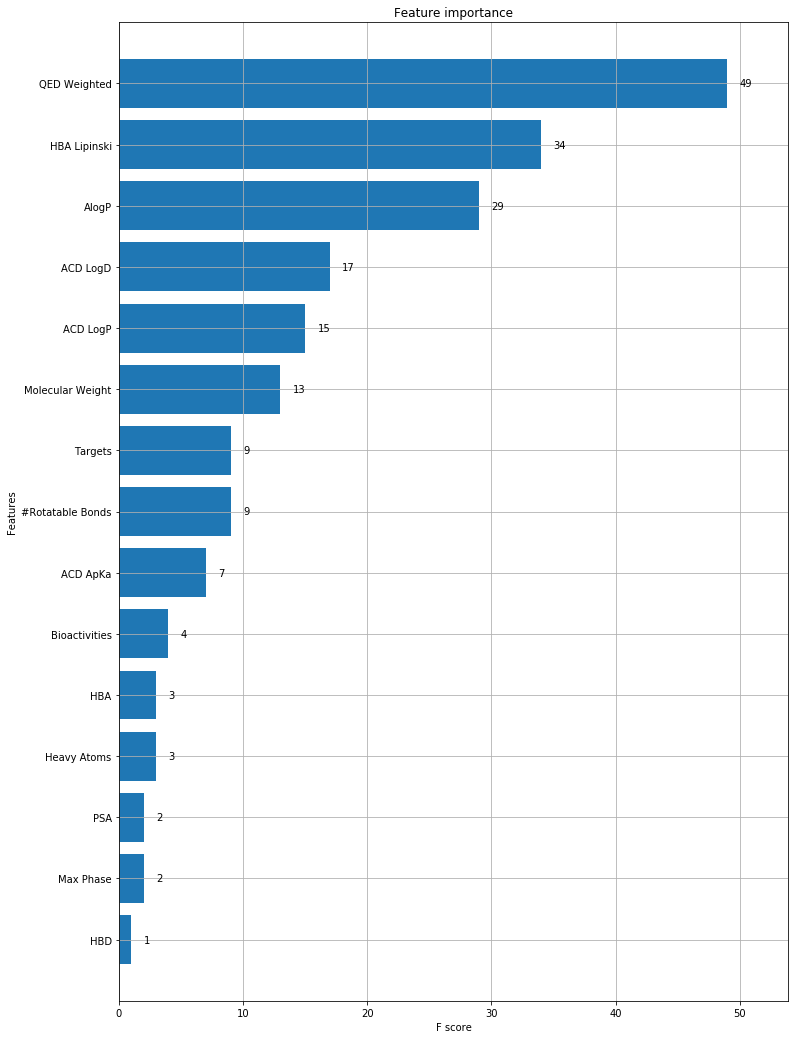

In [56]:
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
pyplot.show()

In [54]:
# breast = Clean_Data(df_brest, 'breast cancer_0')
# breast.to_csv("breast_cancer.csv", index = False)
# breast

,Max Phase,Molecular Weight,Targets,Bioactivities,AlogP,PSA,HBA,HBD,#RO5 Violations,#Rotatable Bonds,...,#RO5 Violations (Lipinski),Molecular Weight (Monoisotopic),Passes Ro3_N,Passes Ro3_Y,Molecular Species_0,Molecular Species_ACID,Molecular Species_BASE,Molecular Species_NEUTRAL,Molecular Species_ZWITTERION,breast cancer_yes
13816,4,302.41,90,223.0,3.97,54.37,3,1,0,0,...,0,302.1882,1,0,0,0,0,1,0,0
13817,0,257.26,117,566.0,0.81,83.96,4,2,0,5,...,0,257.1176,1,0,0,0,0,1,0,0
13818,4,204.30,158,958.0,2.15,15.60,3,0,0,1,...,0,204.0721,0,1,0,0,1,0,0,0
13819,4,363.39,37,184.0,0.15,132.96,6,4,0,4,...,0,363.0889,1,0,0,1,0,0,0,0
13820,4,258.23,206,750.0,0.09,83.55,4,1,0,1,...,0,258.0641,1,0,0,0,0,1,0,0
13821,4,268.27,80,147.0,-2.71,98.82,6,2,0,3,...,0,268.1172,1,0,0,0,0,1,0,0
13822,4,415.43,318,421.0,3.75,101.38,7,2,0,5,...,0,415.1557,1,0,0,0,0,1,0,1
13823,4,303.68,26,109.0,-0.35,119.31,8,3,0,2,...,0,303.0534,1,0,0,0,0,1,0,1
13824,4,302.35,8,55.0,2.37,64.35,3,2,0,7,...,0,302.1431,1,0,0,0,0,1,0,1
13825,4,300.40,77,79.0,3.59,43.37,3,0,0,0,...,0,300.1725,1,0,1,0,0,0,0,1


In [69]:
# Read in full dataset
df_full = pd.read_csv('img_data_all_final.csv')
df_full

,Unnamed: 0,CID,hb_no_img,hb_yes_img,Unnamed: 0.1,bc_no_img,bc_yes_img,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,...,HBD Lipinski,#RO5 Violations (Lipinski),Molecular Weight (Monoisotopic),Molecular Species,Molecular Formula,Smiles,Images,alzheimer,breast cancer,hep B
0,0,10000219,0.8248,0.1752,0,0.0616,0.9384,11262,11262,11262,...,1,0,386.0987,ACID,C14H27O6PS2,CCCCC(=O)SC[C@H](COP(=O)(O)OC)SC(=O)CCCC,https://www.ebi.ac.uk/chembl/api/data/image/CH...,NaN,NaN,NaN
1,1,10001216,0.9472,0.0528,1,0.0539,0.9461,14105,14105,14105,...,0,0,403.1856,NEUTRAL,C19H25N5O5,CN1C(=O)C=C(N2CCN(CCCOc3cccc(c3)[N+](=O)[O-])C...,https://www.ebi.ac.uk/chembl/api/data/image/CH...,NaN,NaN,NaN
2,2,10001279,0.9411,0.0589,2,0.0340,0.9660,13665,13665,13665,...,0,0,404.1882,NEUTRAL,C20H28N4O3S,CSc1ccccc1OCCCN2CCN(CC2)C3=CC(=O)N(C)C(=O)N3C,https://www.ebi.ac.uk/chembl/api/data/image/CH...,NaN,NaN,NaN
3,3,10001759,0.9928,0.0072,3,0.0370,0.9630,6219,6219,6219,...,0,0,412.1918,NEUTRAL,C24H29ClN2O2,Clc1ccc(cc1)C2(CCCC2)C(=O)OCCN3CCN(CC3)c4ccccc4,https://www.ebi.ac.uk/chembl/api/data/image/CH...,NaN,NaN,NaN
4,4,10001924,0.8633,0.1367,4,0.1034,0.8966,11410,11410,11410,...,1,0,379.1896,NEUTRAL,C22H25N3O3,Cc1cccc2COC(=O)N(C3CCN(CC(=O)Nc4ccccc4)CC3)c12,https://www.ebi.ac.uk/chembl/api/data/image/CH...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13907,13907,73303,0.5878,0.4122,13864,0.0000,1.0000,177395,177395,177395,...,6,1,420.1137,ZWITTERION,C15H24N4O6S2,C[C@@H](O)[C@@H]1[C@H]2[C@@H](C)C(=C(N2C1=O)C(...,https://www.ebi.ac.uk/chembl/api/data/image/CH...,NaN,yes,NaN
13908,13908,807,0.0876,0.9124,13865,0.0000,1.0000,385458,385458,385458,...,0,0,253.8089,NaN,I2,II,https://www.ebi.ac.uk/chembl/api/data/image/CH...,NaN,yes,NaN
13909,13909,8768,0.1804,0.8196,13866,0.0000,1.0000,1029100,1029100,1029100,...,2,0,138.0317,NEUTRAL,C7H6O3,Oc1ccc(C=O)cc1O,https://www.ebi.ac.uk/chembl/api/data/image/CH...,NaN,yes,NaN
13910,13910,9444,0.0381,0.9619,13867,0.0000,1.0000,1041013,1041013,1041013,...,5,0,244.0808,NEUTRAL,C8H12N4O5,NC1=NC(=O)N(C=N1)[C@@H]2O[C@H](CO)[C@@H](O)[C@...,https://www.ebi.ac.uk/chembl/api/data/image/CH...,NaN,yes,NaN


In [99]:
# Drop unneeded columns
df_full_cleaned = df_full.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1', 'alzheimer', 'Molecular Formula', 'Smiles', 'Images', 'bc_no_img', 'bc_yes_img', 'ChEMBL ID', 'Name', 'Synonyms', 'Type', 'Structure Type', 'hb_no_img', 'hb_yes_img', 'Unnamed: 0.1.1.1.1', 'breast cancer', 'hep B'], axis=1)

# make copy
df2 = df_full_cleaned

# Fill NaN w/ 0
df2 = df2.fillna(0)

# One hot encode all data attributes
df2 = pd.get_dummies(df2)

# FULL SET BUT WITH CID'S
df2_no_CID = df2.drop(['CID'], axis = 1)
df2.to_csv('df2.csv')


# THIS IS THE FULL SET WE NEED TO RUN PREDICTIONS ON
df2_no_CID = df2_no_CID.drop(['Molecular Species_ZWITTERION'], axis = 1)
df2_no_CID.to_csv('df2_no_CID.csv', index = 0)

df2_no_CID


,Max Phase,Molecular Weight,Targets,Bioactivities,AlogP,PSA,HBA,HBD,#RO5 Violations,#Rotatable Bonds,...,HBA Lipinski,HBD Lipinski,#RO5 Violations (Lipinski),Molecular Weight (Monoisotopic),Passes Ro3_N,Passes Ro3_Y,Molecular Species_0,Molecular Species_ACID,Molecular Species_BASE,Molecular Species_NEUTRAL
0,0,386.47,0,0.0,4.02,89.90,7,1,0,13,...,6,1,0,386.0987,1,0,0,1,0,0
1,0,403.44,0,0.0,0.58,102.85,9,0,0,7,...,10,0,0,403.1856,1,0,0,0,0,1
2,0,404.54,0,0.0,1.40,59.71,8,0,0,7,...,7,0,0,404.1882,1,0,0,0,0,1
3,0,412.96,0,0.0,4.52,32.78,4,0,0,6,...,4,0,0,412.1918,1,0,0,0,0,1
4,0,379.46,0,0.0,3.55,61.88,4,1,0,4,...,6,1,0,379.1896,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13907,4,420.51,139,1967.0,-1.60,162.06,7,5,0,7,...,10,6,1,420.1137,1,0,0,0,0,0
13908,4,253.81,1,14.0,1.77,0.00,0,0,0,0,...,0,0,0,253.8089,0,1,1,0,0,0
13909,0,138.12,31,85.0,0.91,57.53,3,2,0,1,...,3,2,0,138.0317,0,1,0,0,0,1
13910,4,244.21,170,628.0,-3.17,143.72,9,4,0,2,...,9,5,0,244.0808,1,0,0,0,0,1


In [117]:
# RUN PREDICTIONS

# make predictions for test data
confidences_1 = rfc.predict(df2_no_CID)

list_test = []
confidences_2 = rfc.predict_proba(df2_no_CID)

for i in confidences_2:
    list_test.append(i[1])

test = pd.DataFrame()
test["hb_yes_tab"] = list_test
test
    


,hb_yes_tab
0,0.569
1,0.586
2,0.543
3,0.389
4,0.351
...,...
13907,0.705
13908,0.698
13909,0.863
13910,0.823


In [113]:
list_test

[0.569,
 0.586,
 0.543,
 0.389,
 0.351,
 0.622,
 0.443,
 0.742,
 0.549,
 0.782,
 0.809,
 0.79,
 0.399,
 0.574,
 0.425,
 0.425,
 0.443,
 0.423,
 0.404,
 0.465,
 0.394,
 0.496,
 0.384,
 0.441,
 0.574,
 0.438,
 0.393,
 0.295,
 0.579,
 0.59,
 0.34,
 0.388,
 0.565,
 0.498,
 0.371,
 0.377,
 0.483,
 0.538,
 0.529,
 0.757,
 0.284,
 0.463,
 0.659,
 0.395,
 0.368,
 0.463,
 0.386,
 0.396,
 0.419,
 0.354,
 0.341,
 0.449,
 0.607,
 0.356,
 0.388,
 0.348,
 0.353,
 0.379,
 0.552,
 0.484,
 0.579,
 0.416,
 0.555,
 0.575,
 0.737,
 0.805,
 0.305,
 0.287,
 0.408,
 0.442,
 0.431,
 0.441,
 0.429,
 0.371,
 0.496,
 0.577,
 0.581,
 0.556,
 0.372,
 0.529,
 0.392,
 0.534,
 0.359,
 0.497,
 0.631,
 0.526,
 0.327,
 0.404,
 0.554,
 0.573,
 0.366,
 0.582,
 0.321,
 0.391,
 0.555,
 0.292,
 0.512,
 0.4,
 0.7,
 0.434,
 0.486,
 0.489,
 0.712,
 0.715,
 0.572,
 0.591,
 0.326,
 0.554,
 0.762,
 0.505,
 0.596,
 0.341,
 0.728,
 0.715,
 0.747,
 0.395,
 0.393,
 0.614,
 0.351,
 0.373,
 0.521,
 0.439,
 0.548,
 0.821,
 0.383,
 0.322,

In [118]:
df_full["hb_yes_tab"] = list_test

In [119]:
df_full


,Unnamed: 0,CID,hb_no_img,hb_yes_img,Unnamed: 0.1,bc_no_img,bc_yes_img,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,...,#RO5 Violations (Lipinski),Molecular Weight (Monoisotopic),Molecular Species,Molecular Formula,Smiles,Images,alzheimer,breast cancer,hep B,hb_yes_tab
0,0,10000219,0.8248,0.1752,0,0.0616,0.9384,11262,11262,11262,...,0,386.0987,ACID,C14H27O6PS2,CCCCC(=O)SC[C@H](COP(=O)(O)OC)SC(=O)CCCC,https://www.ebi.ac.uk/chembl/api/data/image/CH...,NaN,NaN,NaN,0.569
1,1,10001216,0.9472,0.0528,1,0.0539,0.9461,14105,14105,14105,...,0,403.1856,NEUTRAL,C19H25N5O5,CN1C(=O)C=C(N2CCN(CCCOc3cccc(c3)[N+](=O)[O-])C...,https://www.ebi.ac.uk/chembl/api/data/image/CH...,NaN,NaN,NaN,0.586
2,2,10001279,0.9411,0.0589,2,0.0340,0.9660,13665,13665,13665,...,0,404.1882,NEUTRAL,C20H28N4O3S,CSc1ccccc1OCCCN2CCN(CC2)C3=CC(=O)N(C)C(=O)N3C,https://www.ebi.ac.uk/chembl/api/data/image/CH...,NaN,NaN,NaN,0.543
3,3,10001759,0.9928,0.0072,3,0.0370,0.9630,6219,6219,6219,...,0,412.1918,NEUTRAL,C24H29ClN2O2,Clc1ccc(cc1)C2(CCCC2)C(=O)OCCN3CCN(CC3)c4ccccc4,https://www.ebi.ac.uk/chembl/api/data/image/CH...,NaN,NaN,NaN,0.389
4,4,10001924,0.8633,0.1367,4,0.1034,0.8966,11410,11410,11410,...,0,379.1896,NEUTRAL,C22H25N3O3,Cc1cccc2COC(=O)N(C3CCN(CC(=O)Nc4ccccc4)CC3)c12,https://www.ebi.ac.uk/chembl/api/data/image/CH...,NaN,NaN,NaN,0.351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13907,13907,73303,0.5878,0.4122,13864,0.0000,1.0000,177395,177395,177395,...,1,420.1137,ZWITTERION,C15H24N4O6S2,C[C@@H](O)[C@@H]1[C@H]2[C@@H](C)C(=C(N2C1=O)C(...,https://www.ebi.ac.uk/chembl/api/data/image/CH...,NaN,yes,NaN,0.705
13908,13908,807,0.0876,0.9124,13865,0.0000,1.0000,385458,385458,385458,...,0,253.8089,NaN,I2,II,https://www.ebi.ac.uk/chembl/api/data/image/CH...,NaN,yes,NaN,0.698
13909,13909,8768,0.1804,0.8196,13866,0.0000,1.0000,1029100,1029100,1029100,...,0,138.0317,NEUTRAL,C7H6O3,Oc1ccc(C=O)cc1O,https://www.ebi.ac.uk/chembl/api/data/image/CH...,NaN,yes,NaN,0.863
13910,13910,9444,0.0381,0.9619,13867,0.0000,1.0000,1041013,1041013,1041013,...,0,244.0808,NEUTRAL,C8H12N4O5,NC1=NC(=O)N(C=N1)[C@@H]2O[C@H](CO)[C@@H](O)[C@...,https://www.ebi.ac.uk/chembl/api/data/image/CH...,NaN,yes,NaN,0.823


In [121]:
df_full.to_csv('203am.csv', index = False)